# Data Preprocessing

## Download & export data tables

### Download Microsoft OHLCV with `yfinance` library

In [1]:
import yfinance as yf

In [6]:
ticker = 'INTC'
df_TICKER = yf.download(ticker)
df_TICKER

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.325521,0.330729,0.325521,0.325521,0.181500,10924800
1980-03-18,0.325521,0.328125,0.322917,0.322917,0.180048,17068800
1980-03-19,0.330729,0.335938,0.330729,0.330729,0.184403,18508800
1980-03-20,0.330729,0.334635,0.329427,0.329427,0.183678,11174400
1980-03-21,0.322917,0.322917,0.317708,0.317708,0.177143,12172800
...,...,...,...,...,...,...
2024-09-27,24.160000,24.660000,23.700001,23.910000,23.910000,85883300
2024-09-30,23.740000,23.950001,23.090000,23.459999,23.459999,66308200
2024-10-01,23.459999,23.719999,22.260000,22.690001,22.690001,86344400


### Download any ticker

**Search for the ticker code**

YFinance: https://finance.yahoo.com/

- [x] Microsoft: MSFT
- [ ] Bitcoin: ???

In [63]:
ticker = 'BTC-USD'
df_BTC = yf.download(ticker)
df_BTC

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
...,...,...,...,...,...,...
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943
2023-05-12,26990.148438,27054.158203,26178.617188,26290.275391,26290.275391,19155535872


## Visualize the data with plotly

https://plotly.com/python/candlestick-charts/

In [3]:
import plotly.graph_objects as go

In [7]:
df = df_TICKER

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

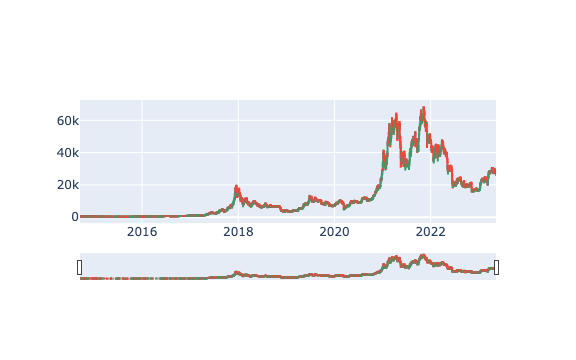

In [66]:
df = df_BTC

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

## Export the data

### Microsoft data

#### Drop `Adj Close`

- To not confuse the `Close` and `Adj Close`

In [8]:
df_TICKER = df_TICKER.drop(columns='Adj Close')

#### To Excel

In [9]:
#df_MSFT.to_excel('data/Microsoft_Stock_Price_Historical_Daily.xlsx')
df_TICKER.to_excel('data/INTC_Stock_Price_Historical_Daily.xlsx')

#### To CSV

- Less size in memory

In [10]:
#df_MSFT.to_csv('data/Microsoft_Stock_Price_Historical_Daily.csv')
df_TICKER.to_csv('data/INTC_Stock_Price_Historical_Daily.csv')

### Bitcoin data altogether

#### Define ticker

In [80]:
ticker = 'BTC-USD'
ticker

'BTC-USD'

#### Download OLHVC

In [82]:
df_ticker = yf.download(ticker)
df_ticker

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
...,...,...,...,...,...,...
2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943
2023-05-12,26990.148438,27054.158203,26178.617188,26276.955078,26276.955078,19123081216


#### Create file path

In [79]:
file_path = f'data/{ticker}.xlsx'
file_path

'data/BTC-USD.xlsx'

#### Export to Excel

In [79]:
df_ticker.to_excel(file_path)

'data/BTC-USD.xlsx'

#### Export to CSV

In [79]:
df_ticker.to_excel(f'data/{ticker}.csv')

'data/BTC-USD.xlsx'

#### Snippet

In [79]:
ticker = 'BTC-USD'
df_ticker = yf.download(ticker)
df_ticker.to_excel(f'data/{ticker}.xlsx')
df_ticker.to_excel(f'data/{ticker}.csv')

## [ ] Data Preprocessing

In [ ]:
???

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,-1.549143,DOWN
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,-0.321692,DOWN
...,...,...,...,...,...,...,...
2023-03-14,256.750000,261.070007,255.860001,260.790009,33620300,-1.751806,DOWN
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,-3.895731,DOWN


### Load the data

In [11]:
import pandas as pd

df_ticker = pd.read_excel(
    'data/INTC_Stock_Price_Historical_Daily.xlsx',
    parse_dates=['Date'], index_col=0
)

df_ticker

,Open,High,Low,Close,Volume
Date,,,,,
1980-03-17,0.325521,0.330729,0.325521,0.325521,10924800
1980-03-18,0.325521,0.328125,0.322917,0.322917,17068800
1980-03-19,0.330729,0.335938,0.330729,0.330729,18508800
1980-03-20,0.330729,0.334635,0.329427,0.329427,11174400
1980-03-21,0.322917,0.322917,0.317708,0.317708,12172800
...,...,...,...,...,...
2024-09-27,24.160000,24.660000,23.700001,23.910000,85883300
2024-09-30,23.740000,23.950001,23.090000,23.459999,66308200
2024-10-01,23.459999,23.719999,22.260000,22.690001,86344400


### Filter the data

![](src/Microsoft_x_LinkedIn.png)

In [12]:
#df_microsoft_linkedin= df_microsoft.loc['2016-12-08':,:].copy()
df_ticker_subset= df_ticker.loc['2020-01-01':,:].copy()

## Create new columns

### Tomorrow's percentage change

In [13]:
#df_microsoft_linkedin['change_tomorrow'] = df_microsoft_linkedin.Close.pct_change(-1) * 100 * -1
df_ticker_subset['change_tomorrow'] = df_ticker_subset.Close.pct_change(-1) * 100 * -1

In [14]:
df_ticker_subset

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2020-01-02,60.240002,60.970001,60.220001,60.840000,18056000,-1.231284
2020-01-03,59.810001,60.700001,59.810001,60.099998,15293900,-0.283661
2020-01-06,59.590000,60.200001,59.330002,59.930000,17755200,-1.696929
2020-01-07,59.779999,59.799999,58.889999,58.930000,21876100,0.067833
2020-01-08,58.889999,59.320000,58.520000,58.970001,23133500,0.556489
...,...,...,...,...,...,...
2024-09-27,24.160000,24.660000,23.700001,23.910000,85883300,-1.918162
2024-09-30,23.740000,23.950001,23.090000,23.459999,66308200,-3.393559
2024-10-01,23.459999,23.719999,22.260000,22.690001,86344400,-1.339889


In [15]:
df_ticker_subset = df_ticker_subset.dropna().copy()

### Did the stock go up or down?

In [16]:
import numpy as np

In [17]:
df_ticker_subset['change_tomorrow_direction'] = np.where(
    df_ticker_subset.change_tomorrow > 0, 'UP', 'DOWN')

In [18]:
df_ticker_subset.change_tomorrow_direction.value_counts()

change_tomorrow_direction
DOWN    602
UP      594
Name: count, dtype: int64

<Axes: xlabel='Date'>

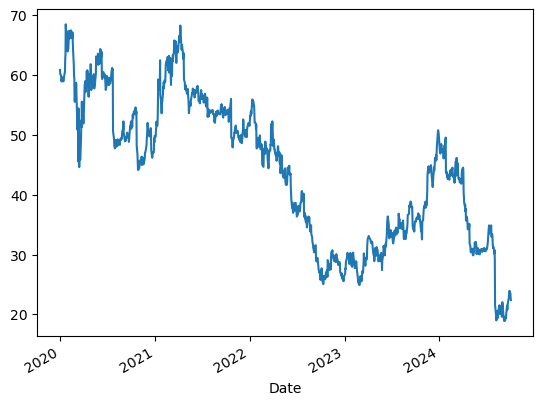

In [19]:
df_ticker_subset.Close.plot()

## Export preprocessed DataFrame into an Excel

In [20]:
df_ticker_subset.to_excel('data/INTC_subset_Processed.xlsx')